# Libraries 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
# from statsFuncs import mean_confidence_interval
# from statsFuncs import compDistributions
import scipy
import random
import math 
from scipy import stats
mpl.rcParams['axes.linewidth'] = 2

import numpy as np
from scipy.integrate import cumtrapz
from scipy.stats import norm
from matplotlib import pyplot as plt


# Paths 

In [6]:
fig3_path = os.getcwd()
figures_path = str(Path(fig3_path).parent)
datapath = figures_path + '/data/naive_subjects/Analysis9_29_2020/naive_back_rbf/'

# Plot params 

In [50]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Subject params 

In [204]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects = folders-1

84 files, 13 folders
12 subjects


In [63]:
subject_names = ['AR', 'CK', 'CT', 'EW', 'HL', 'IS', 'JP', 'MF', 'NC', 'SK', 'SS']

# Plot histograms 

Text(0.5, 1.0, 'Naives\n\n')

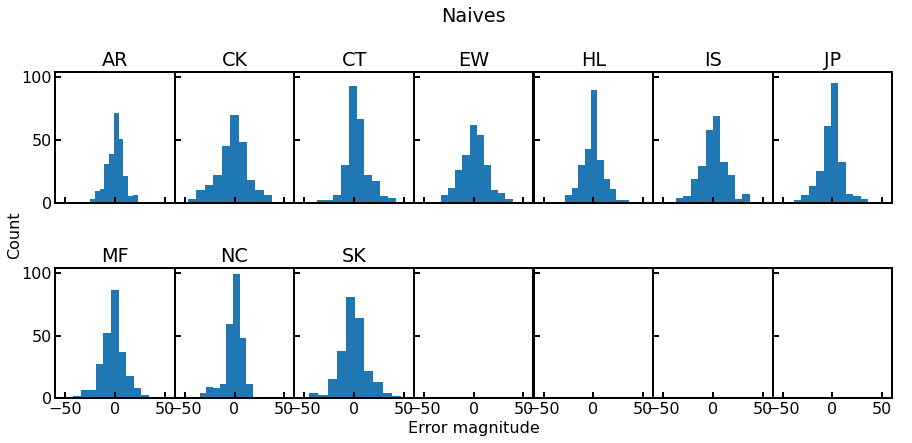

In [7]:
df_percentiles = pd.DataFrame(columns=['SUBJECT','0TH','50TH'])
alldata = pd.DataFrame()

row = 0
fig, axs = plt.subplots(2,7, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.add_subplot(111, frameon=False)

axs = axs.ravel()
subject_names_wsuper = subject_names[:-1]
for subject in subject_names_wsuper:
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
    df_percentiles.loc[row,'SUBJECT'] = subject
    alldata[subject] = subjectdata['responseError']

    axs[row].hist(subjectdata['responseError'])
    axs[row].set_xlabel('')
    axs[row].set_ylabel('')
    axs[row].set_xlim([-60, 60])
    axs[row].set_title(subject)

    row += 1
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Error magnitude')
plt.ylabel('Count')
plt.title('Naives\n\n')

# CRD

## Define functions 

In [61]:
def sigmoid(x,a):
    return 0.8/(1+np.exp(-a*x)) + 0.1

def inverse_sigmoid(y, a):
    return -math.log(0.8/(y-0.1)-1)/a

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x-mean)**2/(2*stddev**2))

def gaussian_original(x, amplitude, mean, stddev):
    return amplitude * ((1/(stddev*np.sqrt(2*np.pi))) * np.exp((-1/2)*(((x-mean)**2)/(stddev**2))))

def cauchy(x, gamma, amplitude, mean):
    return (1/(np.pi*gamma*(1+((x-mean)/gamma)**2)))*amplitude

def vm(x, mean, kai, amplitude):
    x = (x/53)*np.pi
    return amplitude * (np.exp(kai * np.cos(x-mean)) / (i0(kai) * 2 * np.pi))
                  
def cdf(counts):
    cdf = np.cumsum (counts)
    cdf = cdf/cdf[-1]
    
    counts_filtered = counts.copy()
    counts_filtered[counts_filtered < 5] = 0
    cdf_filtered = np.cumsum (counts_filtered)
    c = cdf_filtered.copy()
    cdf_filtered = cdf_filtered/cdf_filtered[-1]
    

        
    
    return cdf, cdf_filtered, counts_filtered
    
def cdf_gaussian_cauchy(data, title):
    counts, bin_edges = np.histogram(data, bins=n_bins)
    
    if title=='SuperSubject':
        counts = counts/13
    
    cdf_og, cdf_filtered_og, counts_filtered_og = cdf(counts)
    
    popt_cauchy, _ = curve_fit(cauchy, bin_edges[1:], counts) #, p0=4, bounds= (0,np.inf))
    popt_gaussian, _ = curve_fit(gaussian, bin_edges[1:], counts)
    popt_vm, _ = curve_fit(vm, bin_edges[1:], counts)
    
    counts_cauchy = cauchy(bin_edges[1:], *popt_cauchy)
#     print(popt_gaussian)
    counts_gaussian = gaussian(bin_edges[1:], *popt_gaussian)
    counts_vm = vm(bin_edges[1:,], *popt_vm)
    
    cdf_cauchy, cdf_filtered_cauchy, counts_cauchy_filtered = cdf(counts_cauchy)
    cdf_gaussian, cdf_filtered_gaussian, counts_gaussian_filtered = cdf(counts_gaussian)
    cdf_vm, cdf_filtered_vm, counts_vm_filtered = cdf(counts_vm)
    
    
    bestvals_og, temp_og = curve_fit(sigmoid,bin_edges[1:],cdf_og,p0=[5])
    bestvals_cauchy, temp_cauchy = curve_fit(sigmoid,bin_edges[1:],cdf_filtered_cauchy,p0=[5])
    bestvals_gaussian, temp_gaussian = curve_fit(sigmoid,bin_edges[1:],cdf_filtered_gaussian,p0=[5])
    bestvals_vm, temp_vm = curve_fit(sigmoid,bin_edges[1:],cdf_filtered_vm,p0=[5])
    
    perc_25_og = inverse_sigmoid(0.25, bestvals_og)
    perc_75_og = inverse_sigmoid(0.75, bestvals_og)
        
    perc_25_cauchy = inverse_sigmoid(0.25, bestvals_cauchy)
    perc_75_cauchy = inverse_sigmoid(0.75, bestvals_cauchy)
    
    perc_25_gaussian = inverse_sigmoid(0.25, bestvals_gaussian)
    perc_75_gaussian = inverse_sigmoid(0.75, bestvals_gaussian)

    perc_25_vm = inverse_sigmoid(0.25, bestvals_vm)
    perc_75_vm = inverse_sigmoid(0.75, bestvals_vm)    
    
    plt.plot(bin_edges[1:], cdf_og, color='red', linewidth=1.5, label='original')
#     plt.plot(bin_edges[1:], sigmoid(bin_edges[1:], bestvals_og), color='red', linewidth=1.5, label='original')
    plt.plot(bin_edges[1:], sigmoid(bin_edges[1:], bestvals_cauchy), color='blue', linewidth=2.5,label='cauchy')
    plt.plot(bin_edges[1:], sigmoid(bin_edges[1:], bestvals_gaussian), color='green', linewidth=2.5,label='gaussian')
    plt.plot(bin_edges[1:], sigmoid(bin_edges[1:], bestvals_vm), color='purple', linewidth=2.5,label='vm')
    
    plt.xlim([-60, 40])
    plt.ylabel('CDF')
    plt.xlabel('Response Error')
    plt.legend()
    plt.title(title)
    plt.show()
    
    return (perc_75_og - perc_25_og)/2, (perc_75_gaussian - perc_25_gaussian)/2, (perc_75_cauchy - perc_25_cauchy)/2, (perc_75_vm - perc_25_vm)/2


## Calculate CRD w Gaussian, Cauchy and VM fit

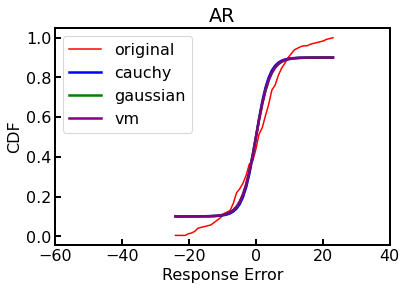

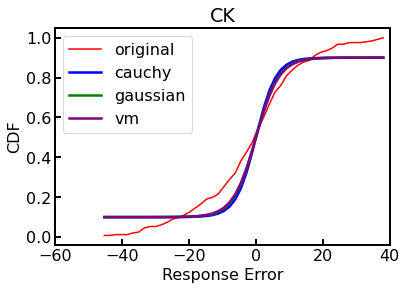

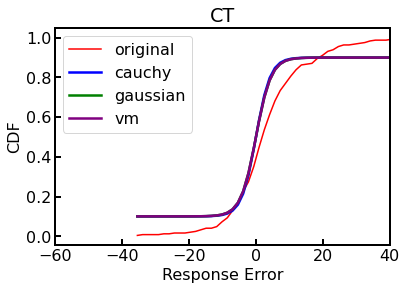

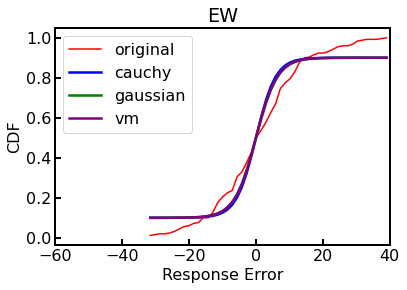

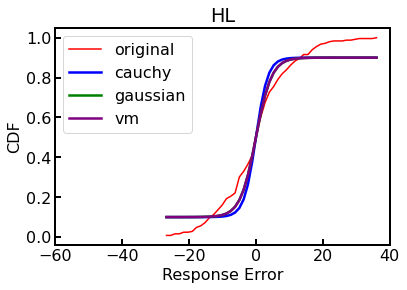

<ipython-input-61-9cb2760d0001>:2: RuntimeWarning: overflow encountered in exp
  return 0.8/(1+np.exp(-a*x)) + 0.1


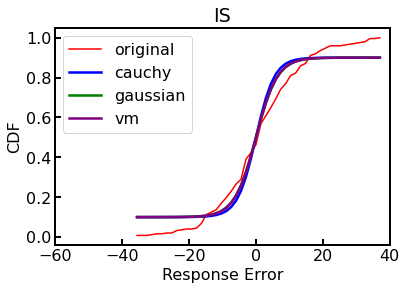

<ipython-input-61-9cb2760d0001>:2: RuntimeWarning: overflow encountered in exp
  return 0.8/(1+np.exp(-a*x)) + 0.1


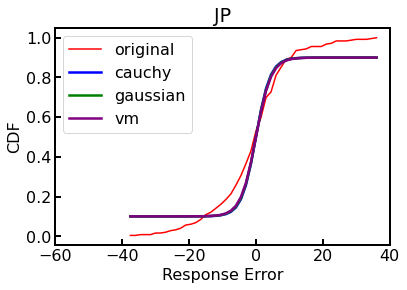

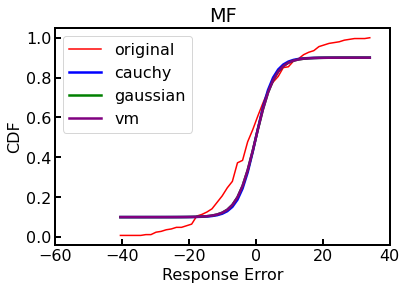

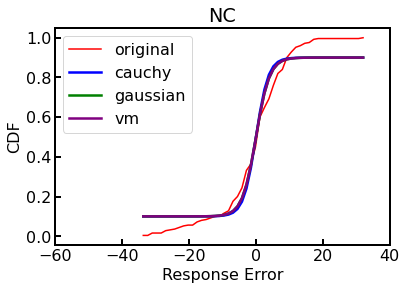

<ipython-input-61-9cb2760d0001>:2: RuntimeWarning: overflow encountered in exp
  return 0.8/(1+np.exp(-a*x)) + 0.1


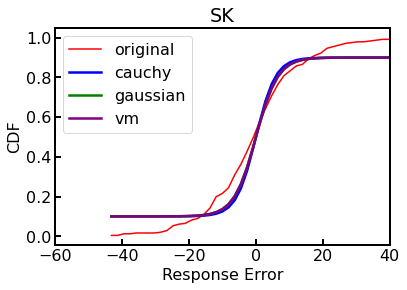

<ipython-input-61-9cb2760d0001>:2: RuntimeWarning: overflow encountered in exp
  return 0.8/(1+np.exp(-a*x)) + 0.1


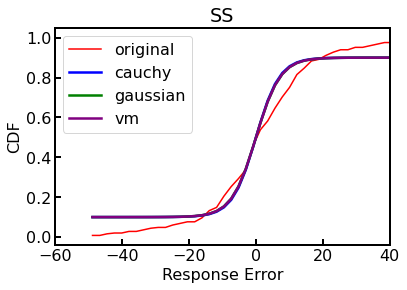

In [64]:
cdf_data = pd.DataFrame(columns=['SUBJECT','JND_OG',  'JND_GAUSSIAN', 'JND_CAUCHY'])
n_bins=50
row = 0
for subject in subject_names:
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]

    jnd_og, jnd_gaussian, jnd_cauchy, jnd_vm = cdf_gaussian_cauchy(subjectdata['responseError'], title=subject)
    
    cdf_data.loc[row,'SUBJECT'] = subject
    cdf_data.loc[row, 'JND_OG'] = jnd_og[0]
    cdf_data.loc[row, 'JND_GAUSSIAN'] = jnd_gaussian[0]
    cdf_data.loc[row, 'JND_CAUCHY'] = jnd_cauchy[0]
    cdf_data.loc[row, 'JND_VM'] = jnd_vm[0]
    
    row += 1

(0.0, 5.5)

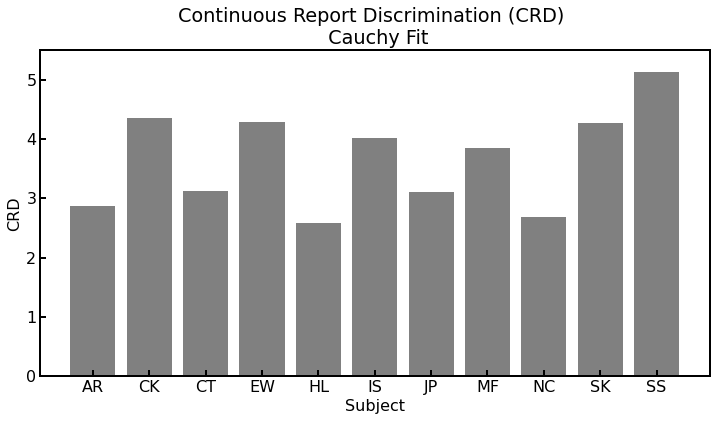

In [20]:
plt.figure(figsize=(12,6))
plt.bar(cdf_data['SUBJECT'],  cdf_data['JND_CAUCHY'], color='gray')
plt.ylabel('CRD')
plt.xlabel('Subject')
plt.title('Continuous Report Discrimination (CRD) \n Cauchy Fit')
plt.ylim([0, 5.5])

(0.0, 5.5)

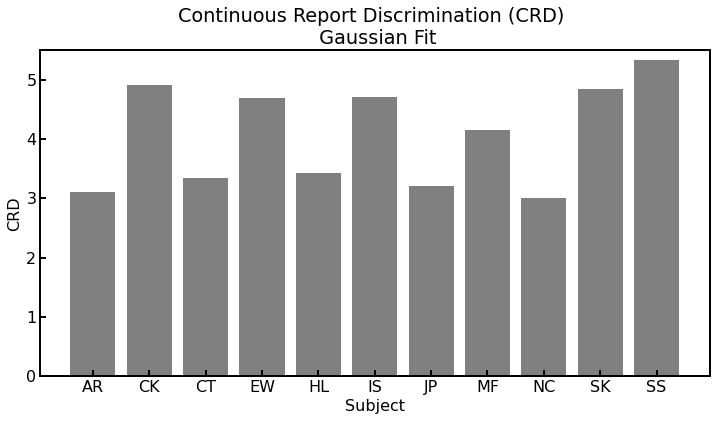

In [21]:
plt.figure(figsize=(12,6))
plt.bar(cdf_data['SUBJECT'],  cdf_data['JND_GAUSSIAN'], color='gray')
plt.ylabel('CRD')
plt.xlabel('Subject')
plt.title('Continuous Report Discrimination (CRD) \n Gaussian Fit')
plt.ylim([0, 5.5])

(0.0, 5.5)

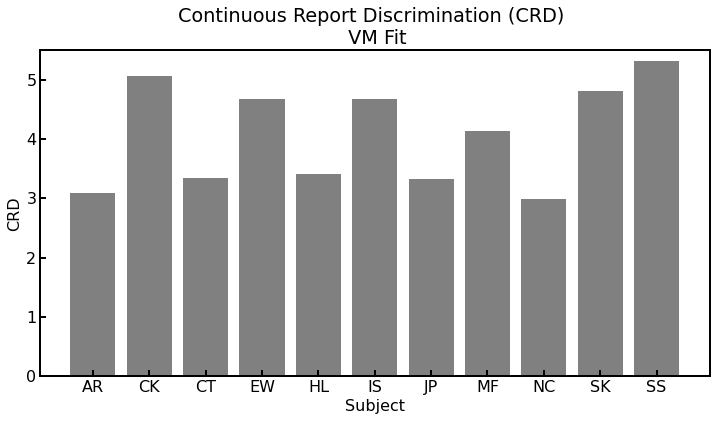

In [25]:
plt.figure(figsize=(12,6))
plt.bar(cdf_data['SUBJECT'],  cdf_data['JND_VM'], color='gray')
plt.ylabel('CRD')
plt.xlabel('Subject')
plt.title('Continuous Report Discrimination (CRD) \n VM Fit')
plt.ylim([0, 5.5])

In [28]:
good_cdf_data = cdf_data.copy()
good_cdf_data.loc[11, 'SUBJECT'] = 'median'
good_cdf_data.loc[11, 'JND_OG'] = np.median(good_cdf_data.loc[range(11), 'JND_OG'])
good_cdf_data.loc[11, 'JND_GAUSSIAN'] = np.median(good_cdf_data.loc[range(11), 'JND_GAUSSIAN'])
good_cdf_data.loc[11, 'JND_CAUCHY'] = np.median(good_cdf_data.loc[range(11), 'JND_CAUCHY'])
good_cdf_data.loc[11, 'JND_VM'] = np.median(good_cdf_data.loc[range(11), 'JND_VM'])
good_cdf_data

,SUBJECT,JND_OG,JND_GAUSSIAN,JND_CAUCHY,JND_VM
0,AR,4.311557,3.103060,2.868504,3.097421
1,CK,7.552095,4.908576,4.358109,5.068782
2,CT,4.945903,3.343341,3.125757,3.345015
3,EW,6.762769,4.700855,4.290231,4.669586
4,HL,5.017284,3.426521,2.593410,3.419489
5,IS,6.389805,4.712390,4.022431,4.668685
6,JP,4.839885,3.216171,3.112975,3.330901
7,MF,5.947200,4.150477,3.855552,4.141895
8,NC,4.073102,3.002340,2.684217,2.995517
9,SK,6.645061,4.841374,4.272870,4.813544


In [30]:
jnd_vm_sem = stats.sem(good_cdf_data.loc[range(11), 'JND_VM'])
jnd_vm_sem

0.25958108032781513

In [31]:
jnd_vm_sem_all = [0]*11
jnd_vm_sem_all.append(jnd_vm_sem)
jnd_vm_sem_all

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25958108032781513]

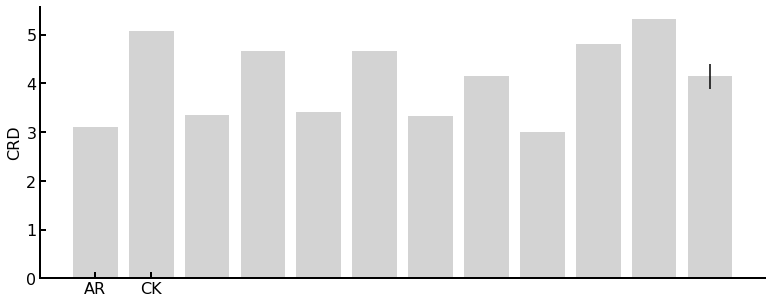

In [33]:
plt.figure(figsize=(13, 5))
ax = plt.bar(good_cdf_data['SUBJECT'], good_cdf_data['JND_VM'], color='lightgrey', yerr=jnd_vm_sem_all)
plt.ylabel('CRD')
plt.xticks(range(2), subject_names.append('Median'))
sns.despine(top=True, right=True, left=False, bottom=False)


## Goodness of fit 

Here, yi refers to your input y-values, fi refers to your fitted y-values, and ̅y refers to the mean input y-value.

In [64]:
# residual sum of squares
def r2(x, y,  y_fit, title):
#     weight_param = 1/(abs(x)+1)
#     plt.plot((y - y_fit) ** 2)
#     plt.ylim([0, 2500])
#     plt.title(title)
#     plt.show()
    ss_res = np.sum(((y - y_fit) ** 2))
    
    # total sum of squares
    ss_tot = np.sum(((y - np.mean(y)) ** 2))

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    return r2

def calculate_r2_subjects(data, title):
    counts, bin_edges = np.histogram(data, bins=n_bins)
    popt_cauchy, _ = curve_fit(cauchy, bin_edges[1:], counts) #, p0=4, bounds= (0,np.inf))
    popt_gaussian, _ = curve_fit(gaussian, bin_edges[1:], counts)
    popt_vm, _ = curve_fit(vm, bin_edges[1:], counts)
    
    counts_cauchy = cauchy(bin_edges[1:], *popt_cauchy)
    counts_gaussian = gaussian(bin_edges[1:], *popt_gaussian)
    counts_vm = vm(bin_edges[1:], *popt_vm)

    r2_fit_gaussian = r2(bin_edges[1:], counts, counts_cauchy, title+'Gaussian')
    r2_fit_cauchy = r2(bin_edges[1:], counts, counts_gaussian, title+'Cauchy')
    r2_fit_vm = r2(bin_edges[1:], counts, counts_vm, title+'VM')
    
    
    return r2_fit_gaussian, r2_fit_cauchy, r2_fit_vm

In [65]:
r2_data = pd.DataFrame(columns=['SUBJECT','R2_GAUSSIAN', 'R2_CAUCHY', 'R2_VM'])

row = 0
for subject in subject_names:
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]

    r2_fit_gaussian, r2_fit_cauchy, r2_fit_vm= calculate_r2_subjects(subjectdata['responseError'], subject)
    
    r2_data.loc[row,'SUBJECT'] = subject
    r2_data.loc[row, 'R2_GAUSSIAN'] = r2_fit_gaussian
    r2_data.loc[row, 'R2_CAUCHY'] = r2_fit_cauchy
    r2_data.loc[row, 'R2_VM'] = r2_fit_vm
    
    
    row += 1

In [66]:
r2_data_melted = r2_data.melt(id_vars=['SUBJECT'], value_vars=['R2_GAUSSIAN','R2_CAUCHY', 'R2_VM'])

Text(0, 0.5, 'R2')

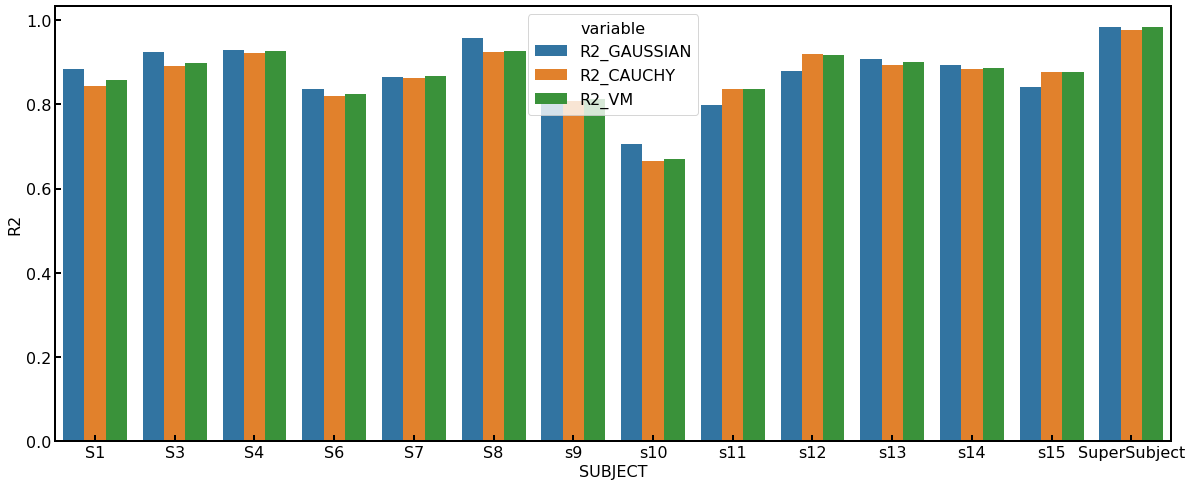

In [67]:
plt.figure(figsize=(20,8))
sns.barplot(x='SUBJECT', y='value', hue='variable', data=r2_data_melted)
plt.ylabel('R2')


## Comparing fits 

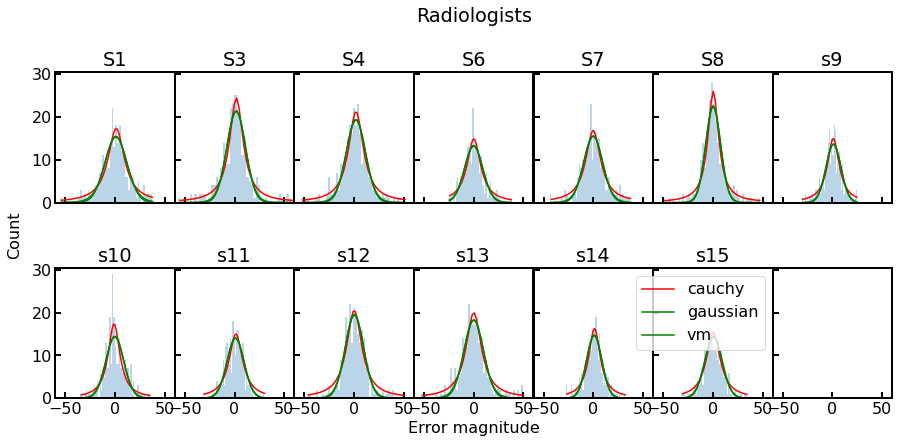

In [68]:
row = 0
fig, axs = plt.subplots(2,7, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.add_subplot(111, frameon=False)

axs = axs.ravel()

for subject in subject_names_wsuper:
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
    counts, bin_edges = np.histogram(subjectdata['responseError'], bins=n_bins)
    popt_cauchy, _ = curve_fit(cauchy, bin_edges[1:], counts) 
    popt_gaussian, _ = curve_fit(gaussian, bin_edges[1:], counts)
    popt_vm, _ = curve_fit(vm, bin_edges[1:], counts)
    axs[row].hist(subjectdata['responseError'], bins=n_bins, alpha=0.3)
    axs[row].plot(bin_edges[1:], cauchy(bin_edges[1:], *popt_cauchy), color='red', label='cauchy')
    axs[row].plot(bin_edges[1:], gaussian(bin_edges[1:], *popt_gaussian), color='green', label='gaussian')
    axs[row].plot(bin_edges[1:], vm(bin_edges[1:], *popt_vm), color='green', label='vm')
    axs[row].set_xlabel('')
    axs[row].set_ylabel('')
    axs[row].set_xlim([-60, 60])
    axs[row].set_title(subject)
    
    if subject == 's15':
        axs[row].legend()
    
    row += 1
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Error magnitude')
plt.ylabel('Count')
plt.title('Naives\n\n');
# plt.legend()


# Category boundaries 

## Function definition 

In [51]:
def vonmise_derivative(xdata, a = 25, kai = 4):
    xdata = xdata / 75 * np.pi
    return - a / (i0(kai) * 2 * np.pi) * exp(kai * cos(xdata)) * kai * sin(xdata) # Derivative of vonmise formula
def getRunningMean(stimuli_diff, filtered_responseError, halfway =74, step = 8):
    RM = [None] * (2 * halfway + 1); # running mean initialization
    xvals = list(range(-halfway, halfway + 1)) # index for running mean -90~90 + -90~90 (avoid error in sep[jj] == 91\92...
    allx_vals = xvals + xvals
    for ii in range(0,len(xvals) - 1): # start running mean calculation 0~180
        if ii - step // 2 >= 0:
            sep = allx_vals[(ii - step // 2) : (ii + step // 2 + 1)] # symmetric to avoid shift
        else:
            sep = allx_vals[(ii - step // 2) : len(allx_vals)] + allx_vals[0 : (ii + step // 2 + 1)]
        sep_sum = []
        for jj in range(0,len(sep)): # match every value in sep to every stimuli_diff point
            for kk in range(0, len(stimuli_diff)):
                if stimuli_diff[kk] == sep[jj]:
                    sep_sum.insert(0, filtered_responseError[kk])
        RM[ii] = np.mean(sep_sum)
    RM[2 * halfway] = RM[0]
    return RM, xvals

def getRegressionLine(x, y, peak):
    stimuli_diff_filtered = []
    filtered_responseError_new = []
    for i in range(len(x)):
        if x[i] < peak + 1 and x[i] > - peak + 1:
            stimuli_diff_filtered.append(x[i])
            filtered_responseError_new.append(y[i])
    coef = np.polyfit(stimuli_diff_filtered,filtered_responseError_new,1)
    poly1d_fn = np.poly1d(coef)
    return poly1d_fn, coef

In [52]:
def category_definition(morph):
    
    if (morph in range(124, 148)) or (morph in range(1, 26)):
        category = 'A'
    elif morph in range(26, 75):
        category = 'B'
    elif morph in range(75, 124):
        category = 'C'
        
    return category

## Empirical 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


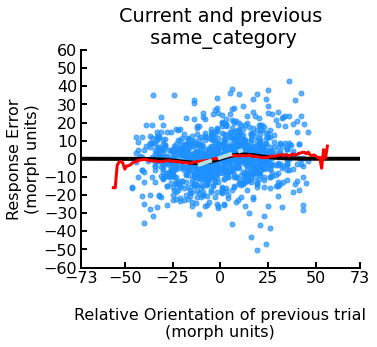

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


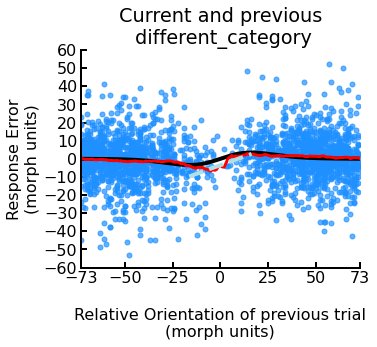

In [408]:
def amplitude_calc(data, title):
    ## Von Mise fitting: Shape Similarity##
    init_vals = [-25, 4]
    best_vals, covar = curve_fit(vonmise_derivative, data['Stim_diff'], data['responseError'], p0=init_vals, bounds = ([-60,2],[60,4]))
    #### RUNNING MEAN ####
    RM, xvals = getRunningMean(data['Stim_diff'], data['responseError'], step = 20)

    plt.figure(figsize=(5, 4))
    plt.plot(data['Stim_diff'], data['responseError'], color='dodgerblue', marker='o', linestyle='none', alpha=0.7, markersize=5)
    x = np.linspace(-75, 75, 300)
    y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]
    DoVM_values = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in data['Stim_diff']]
    plt.plot(x, y, '-', linewidth = 4, color='k')
    plt.plot(xvals, RM, label = 'Running Mean', color = 'red', linewidth = 3)
    peak_x = (x[np.argmax(y)])
    poly1d_fn, coef = getRegressionLine(x = data['Stim_diff'], y= data['responseError'], peak = peak_x)
    xdata = np.linspace(-peak_x, peak_x, 100)
    plt.plot(xdata, poly1d_fn(xdata), linestyle='--', color='powderblue', linewidth = 4)
    plt.xlim([-73, 73])
    plt.ylim([-60, 60])
    plt.yticks(np.arange(-60, 70, 10))
    # plt.xticks(np.arange(-70, 80, 20))
    plt.xticks([-73, -50, -25, 0, 25, 50, 73])
    sns.despine()
    # print(coef[0], coef[1])
    plt.title('Current and previous\n ' + title)
    plt.ylabel('Response Error\n(morph units)')
    plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')
    plt.savefig('RunningMean_DOGfit_Naives' + title + '.eps', bbox_inches='tight', dpi=1200)
    plt.savefig('RunningMean_DOGfit_Naives' + title + '.jpg', bbox_inches='tight', dpi=1200)
    plt.show()
    
    if x[np.argmax(y)] > 0: 
        amplitude = np.max(y)
    else: 
        amplitude = -np.max(y)
        
        
    return amplitude

def vonmise_derivative_same(xdata, a = 25, kai = 4):
    xdata = xdata / 53 * np.pi
    return - a / (i0(kai) * 2 * np.pi) * exp(kai * cos(xdata)) * kai * sin(xdata) # Derivative of vonmise formula
def amplitude_calc_same(data, title):
    ## Von Mise fitting: Shape Similarity##
    init_vals = [-25, 4]
    best_vals, covar = curve_fit(vonmise_derivative_same, data['Stim_diff'], data['responseError'], p0=init_vals, bounds = ([-60,2],[60,4]))
    #### RUNNING MEAN ####
    RM, xvals = getRunningMean(data['Stim_diff'], data['responseError'], step = 20)

    plt.figure(figsize=(5, 4))
    plt.plot(data['Stim_diff'], data['responseError'], color='dodgerblue', marker='o', linestyle='none', alpha=0.7, markersize=5)
    x = np.linspace(-53, 53, 300)
    y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]
    DoVM_values = [vonmise_derivative_same(xi,best_vals[0],best_vals[1]) for xi in data['Stim_diff']]
    plt.plot(x, y, '-', linewidth = 4, color='k')
    plt.plot(xvals, RM, label = 'Running Mean', color = 'red', linewidth = 3)
    peak_x = (x[np.argmax(y)])
    poly1d_fn, coef = getRegressionLine(x = data['Stim_diff'], y= data['responseError'], peak = peak_x)
    xdata = np.linspace(-peak_x, peak_x, 100)
    plt.plot(xdata, poly1d_fn(xdata), linestyle='--', color='powderblue', linewidth = 4)
    plt.xlim([-73, 73])
    plt.ylim([-60, 60])
    plt.yticks(np.arange(-60, 70, 10))
    # plt.xticks(np.arange(-70, 80, 20))
    plt.xticks([-73, -50, -25, 0, 25, 50, 73])
    sns.despine()
    # print(coef[0], coef[1])
    plt.title('Current and previous\n ' + title)
    plt.ylabel('Response Error\n(morph units)')
    plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')
    plt.savefig('RunningMean_DOGfit_Naives' + title + '.eps', bbox_inches='tight', dpi=1200)
    plt.savefig('RunningMean_DOGfit_Naives' + title + '.jpg', bbox_inches='tight', dpi=1200)
    plt.show()
    
    if x[np.argmax(y)] > 0: 
        amplitude = np.max(y)
    else: 
        amplitude = -np.max(y)
        
        
    return amplitude

# empirical_amp_same_category = amplitude_calc(same_category, 'same_category')
# empirical_amp_diff_category = amplitude_calc(diff_category, 'different_category')
    

In [53]:
def slope_amp_calc(xdata, ydata):
    ## Von Mise fitting: Shape Similarity##
    init_vals = [-25, 4]
    best_vals, covar = curve_fit(vonmise_derivative, xdata, ydata, p0=init_vals, bounds = ([-60,2],[60,4]))

    x = np.linspace(-75, 75, 300)
    y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]
    if x[np.argmax(y)] > 0: 
        amp = np.max(y)
    else: 
        amp = -np.max(y)
#     peak_x = (x[np.argmax(y)])
    peak_x = 18

    poly1d_fn, coef = getRegressionLine(x = xdata, y= ydata, peak = peak_x)

    return coef[0], amp


def init_bootstrap(xdata, ydata, nIterations=5000):
    slope_boots = []
    amp_boots = []
    bsSize = int(1.0 * len(xdata))
    iteration = 0
    while len(slope_boots) < nIterations:
        print(iteration)
        RandIndex = np.random.choice(len(xdata), bsSize, replace=True) # get randi index of xdata
        xdataNEW = [xdata[i] for i in RandIndex] # change xdata index
        ydataNEW = [ydata[i] for i in RandIndex] # change ydata index

        try:
            slope, amp = slope_amp_calc(xdataNEW, ydataNEW)
            slope_boots.append(slope)
            amp_boots.append(amp)
            iteration += 1
        except TypeError:
            pass       

        
    return slope_boots, amp_boots

slopes_v1 = pd.DataFrame(columns=['TYPE', 'SLOPE'])
amps_v1 = pd.DataFrame(columns=['TYPE', 'AMPLITUDE'])

for subject in ['SuperSubject']: #subject_names:
    tmp_same_slope = pd.DataFrame()
    tmp_same_amp = pd.DataFrame()
    tmp_diff_slope = pd.DataFrame()
    tmp_diff_amp = pd.DataFrame()
    
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_-1nBack.csv')
    subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
    subjectdata['same_category'] = subjectdata['stimulusID'].apply(category_definition) == subjectdata['shifted_stimulusID'].apply(category_definition)

    same_category = subjectdata[subjectdata['same_category'] == True].reset_index(drop=True)
    diff_category = subjectdata[subjectdata['same_category'] == False].reset_index(drop=True)
    slope_same_cat, amp_same_cat = init_bootstrap(np.asarray(same_category['Stim_diff']), np.asarray(same_category['responseError']))
    slope_diff_cat, amp_diff_cat = init_bootstrap(np.asarray(diff_category['Stim_diff']), np.asarray(diff_category['responseError']))    

    tmp_same_slope['SLOPE'] = slope_same_cat
    tmp_same_slope['TYPE'] = 'SAME'    

    tmp_same_amp['AMPLITUDE'] = amp_same_cat
    tmp_same_amp['TYPE'] = 'SAME'    

    tmp_diff_slope['SLOPE'] = slope_diff_cat
    tmp_diff_slope['TYPE'] = 'DIFFERENT'    

    tmp_diff_amp['AMPLITUDE'] = amp_diff_cat
    tmp_diff_amp['TYPE'] = 'DIFFERENT'    
    
    slopes_v1 = pd.concat([slopes_v1, tmp_same_slope, tmp_diff_slope])
    amps_v1 = pd.concat([amps_v1, tmp_same_amp, tmp_diff_amp])

slopes_v1.to_csv('slopes_empirical_v1.csv')
amps_v1.to_csv('amps_empirical_v1.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072


3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714


220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469


2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224


3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874


In [31]:
slopes_v1 = pd.read_csv('slopes_empirical_v1.csv')

0.2424


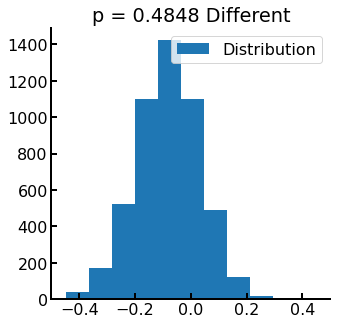

1.0


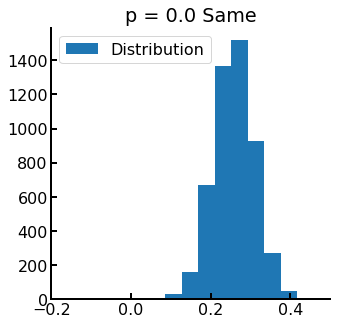

In [33]:
compDistributions.sigDistribution(slopes_v1[slopes_v1['TYPE']=='DIFFERENT']['SLOPE'], extra_title=' Different', xlim=[-0.5, 0.5])
compDistributions.sigDistribution(slopes_v1[slopes_v1['TYPE']=='SAME']['SLOPE'], extra_title=' Same', xlim=[-0.2, 0.5])


In [409]:
# all_category_emp = pd.DataFrame()
# all_category_emp.loc[0, 'NULL']='DIFFERENT'
# all_category_emp.loc[0, 'EMPIRICAL'] = empirical_amp_diff_category
# all_category_emp.loc[1, 'NULL']='SAME'
# all_category_emp.loc[1, 'EMPIRICAL'] = empirical_amp_same_category

Text(0.5, 1.0, 'Empirical slopes\nsame and different category\n version 1')

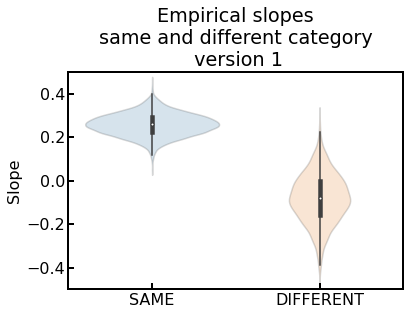

In [35]:

ax = sns.violinplot(x='TYPE', y='SLOPE', data=slopes_v1)
for violin, alpha in zip(ax.collections[::2], [0.2, 0.2]):
    violin.set_alpha(alpha)
    
# sns.swarmplot(ax=ax, x='NULL', y='EMPIRICAL', data=all_category_emp, size=10)
plt.xlabel('')
plt.ylabel('Slope')
plt.ylim([-0.5, 0.5])
plt.title('Empirical slopes\nsame and different category\n version 1')

## Good null

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
def init_null(data, subject, nIterations=5000):
    data_null = pd.DataFrame(columns=['ITERATION', 'SUBJECT', 'TYPE', 'AMPLITUDE', 'SLOPE'])
    row = 0
    data['Stim_diff_og'] = data['Stim_diff']
    amp_same_arr = []
    amp_diff_arr = []
    slope_same_arr = []
    slope_diff_arr = []
    init_vals = [-25, 1.5]

    for iteration in range(nIterations):
#         print(iteration)
        
        data['Stim_diff'] = data['Stim_diff_og'].sample(frac=1).reset_index(drop=True)

        data['same_category'] = data['stimulusID'].apply(category_definition) == data['shifted_stimulusID'].apply(category_definition)

        same_category = data[data['same_category'] == True].reset_index(drop=True)
        diff_category = data[data['same_category'] == False].reset_index(drop=True)

        try: 
            best_vals, covar = curve_fit(vonmise_derivative, diff_category['Stim_diff'], diff_category['responseError']) #,p0=init_vals, bounds= ([-60,1],[60, 1.5]))
    #         print('best_vals', best_vals)
            x = np.linspace(-75, 75, 1000)
            y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]


            if x[np.argmax(y)] > 0: 
                amplitude = np.max(y)
            else: 
                amplitude = -np.max(y)

#             peak_x = (x[np.argmax(y)])
            peak_x = 18
#             print('amplitude different:', amplitude)

            amp_diff_arr.append(amplitude)
            poly1d_fn, coef = getRegressionLine(x = diff_category['Stim_diff'].values, y= diff_category['responseError'].values, peak = abs(peak_x))
            slope_diff_arr.append(coef[0])

        except:
            pass


        try:
            best_vals, covar = curve_fit(vonmise_derivative, same_category['Stim_diff'], same_category['responseError']) #,p0=init_vals)
    #         print('best_vals', best_vals)
            x = np.linspace(-75, 75, 1000)
            y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]


            if x[np.argmax(y)] > 0: 
                amplitude = np.max(y)
            else: 
                amplitude = -np.max(y)

#             peak_x = (x[np.argmax(y)])
            peak_x = 18
            amp_same_arr.append(amplitude)
#             print('amplitude same:', amplitude)

            poly1d_fn, coef = getRegressionLine(x = same_category['Stim_diff'].values, y= same_category['responseError'].values, peak = abs(peak_x))

            slope_same_arr.append(coef[0])
#             print('slope same:', coef[0])

        except:
            pass
        
        
    return amp_diff_arr, slope_diff_arr, amp_same_arr, slope_same_arr




In [56]:
amp_nulls = pd.DataFrame()
slope_nulls = pd.DataFrame()
for subject in ['SuperSubject']:
    print(subject)
    tmp_amp_same = pd.DataFrame()
    tmp_amp_diff = pd.DataFrame()
    tmp_slope_same = pd.DataFrame()
    tmp_slope_diff = pd.DataFrame()
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_-1nBack.csv')
    subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
 
    amp_diff_arr, slope_diff_arr, amp_same_arr, slope_same_arr = init_null(subjectdata, subject, 5000)
    tmp_amp_same['NULL'] = amp_same_arr
    tmp_amp_same['TYPE'] = 'SAME'
    tmp_amp_same['SUBJECT'] = subject
    
    tmp_amp_diff['NULL'] = amp_diff_arr
    tmp_amp_diff['TYPE'] = 'DIFF'  
    tmp_amp_diff['SUBJECT'] = subject

    
    tmp_slope_same['NULL'] = slope_same_arr
    tmp_slope_same['TYPE'] = 'SAME'
    tmp_slope_same['SUBJECT'] = subject

    tmp_slope_diff['NULL'] = slope_diff_arr
    tmp_slope_diff['TYPE'] = 'DIFF'      
    tmp_slope_diff['SUBJECT'] = subject
    
    amp_nulls = pd.concat([amp_nulls, tmp_amp_diff, tmp_amp_same])
    slope_nulls = pd.concat([slope_nulls, tmp_slope_diff, tmp_slope_same])
slope_nulls.to_csv('slope_backup_nulls.csv')
amp_nulls.to_csv('amp_backup_nulls.csv')

SuperSubject


In [36]:
slope_nulls = pd.read_csv('slope_backup_nulls.csv')

Text(0.5, 1.0, 'Null slopes\nsame and different category\n')

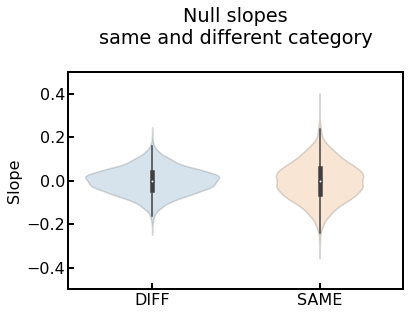

In [38]:

ax = sns.violinplot(x='TYPE', y='NULL', data=slope_nulls)
for violin, alpha in zip(ax.collections[::2], [0.2, 0.2]):
    violin.set_alpha(alpha)
    
# sns.swarmplot(ax=ax, x='NULL', y='EMPIRICAL', data=all_category_emp, size=10)
plt.xlabel('')
plt.ylabel('Slope')
plt.ylim([-0.5, 0.5])
plt.title('Null slopes\nsame and different category\n')

In [40]:
nIterations = 5000

In [41]:
sorted_null_diff = sorted(slope_nulls.loc[slope_nulls['TYPE'] == 'DIFF', 'NULL'])
ci97_null_diff = sorted_null_diff[int(nIterations*0.97)]
ci97_null_diff

0.1141276585859428

In [42]:
sorted_null_same = sorted(slope_nulls.loc[slope_nulls['TYPE'] == 'SAME', 'NULL'])
ci97_null_same = sorted_null_same[int(nIterations*0.97)]
ci97_null_same

0.1596392925431454

In [43]:
def calc_p(data, empirical):
    p = sum(data['NULL'] < empirical)/len(data)
    if p < .5:
        twoTailedP = p * 2;
    else:
        twoTailedP = (1 - p) * 2;
    return twoTailedP
empirical_amp_same_category = np.mean(slopes_v1[slopes_v1['TYPE'] == 'SAME']['SLOPE'])
empirical_amp_diff_category =  np.mean(slopes_v1[slopes_v1['TYPE'] == 'DIFFERENT']['SLOPE'])
p_same = calc_p(slope_nulls[slope_nulls['TYPE'] == 'SAME'], empirical_amp_same_category)
p_diff = calc_p(slope_nulls[slope_nulls['TYPE'] == 'DIFF'], empirical_amp_diff_category)
p_same, p_diff

(0.0032000000000000917, 0.1864)

#  Figure CRD

In [65]:
good_cdf_data = cdf_data.copy()
good_cdf_data.loc[11, 'SUBJECT'] = 'mean'
good_cdf_data.loc[11, 'JND_OG'] = np.mean(good_cdf_data.loc[range(11), 'JND_OG'])
good_cdf_data.loc[11, 'JND_GAUSSIAN'] = np.mean(good_cdf_data.loc[range(11), 'JND_GAUSSIAN'])
good_cdf_data.loc[11, 'JND_CAUCHY'] = np.mean(good_cdf_data.loc[range(11), 'JND_CAUCHY'])
good_cdf_data.loc[11, 'JND_VM'] = np.mean(good_cdf_data.loc[range(11), 'JND_VM'])
good_cdf_data
jnd_vm_sem = stats.sem(good_cdf_data.loc[range(11), 'JND_VM'])
jnd_vm_sem
jnd_vm_sem_all = [0]*11
jnd_vm_sem_all.append(jnd_vm_sem)
jnd_vm_sem_all

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25958108032781513]

Text(0.5, 1.0, 'Naives')

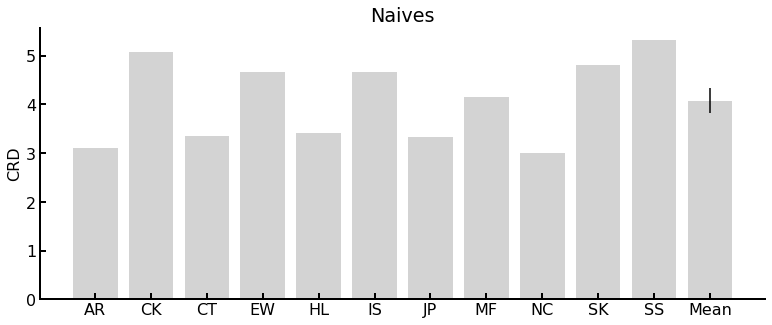

In [66]:
plt.figure(figsize=(13, 5))
ax = plt.bar(good_cdf_data['SUBJECT'], good_cdf_data['JND_VM'], color='lightgrey', yerr=jnd_vm_sem_all)
plt.ylabel('CRD')
plt.xticks(range(12), subject_names + ['Mean'])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('Naives')

In [67]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

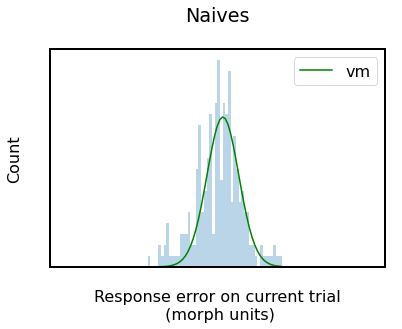

In [94]:
# row = 0
# fig, axs = plt.subplots(2,7, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
# fig.subplots_adjust(hspace = .5, wspace=.001)
# fig.add_subplot(111, frameon=False)

# axs = axs.ravel()
n_bins=50

# for subject in subject_names_wsuper:
subject='AR'
# load data:
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
counts, bin_edges = np.histogram(subjectdata['responseError'], bins=n_bins)
counts[counts < 5] = 0

popt_cauchy, _ = curve_fit(cauchy, bin_edges[1:], counts) 
popt_gaussian, _ = curve_fit(gaussian, bin_edges[1:], counts)
popt_vm, _ = curve_fit(vm, bin_edges[1:], counts)
plt.hist(subjectdata['responseError'], bins=n_bins, alpha=0.3)
plt.plot(bin_edges[1:], vm(bin_edges[1:], *popt_vm), color='green', label='vm')
plt.xlabel('')
plt.ylabel('')
plt.xlim([-60, 60])
plt.title(subject)

plt.legend()
    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Response error on current trial\n (morph units)')
plt.ylabel('Count')
plt.title('Naives\n');
# plt.legend()


In [96]:
subjectdata[['stimulusID', 'morphID', 'shifted_stimulusID', 'shifted_morphID', 'Error', 'responseError', 'Stim_diff']].head()

,stimulusID,morphID,shifted_stimulusID,shifted_morphID,Error,responseError,Stim_diff
0,104.0,55.0,103.0,105.0,2.0,2.000000e+00,1.0
1,103.0,105.0,56.0,46.0,-10.0,-1.000067e+01,47.0
2,56.0,46.0,131.0,6.0,21.0,2.100000e+01,71.0
3,131.0,6.0,18.0,18.0,0.0,-2.959373e-31,-33.0
4,18.0,18.0,141.0,134.0,-7.0,-7.498155e+00,23.0


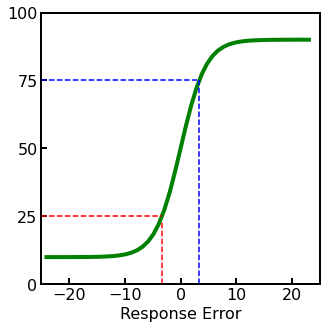

In [69]:
subject='AR'
# load data:
n_bins=50
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
counts, bin_edges = np.histogram(subjectdata['responseError'], bins=n_bins)
cdf_vm, cdf_filtered_vm, counts_vm_filtered = cdf(counts)


bestvals_vm, temp_vm = curve_fit(sigmoid,bin_edges[1:],cdf_filtered_vm,p0=[3])
cdf_og, cdf_filtered_og, counts_filtered_og = cdf(counts)


perc_25_vm = inverse_sigmoid(0.25, bestvals_vm)
perc_75_vm = inverse_sigmoid(0.75, bestvals_vm)    

# plt.plot(bin_edges[1:], cdf_og, color='darkgrey', linewidth=1, label='CDF')
plt.figure(figsize=(5, 5))

plt.plot(bin_edges[1:], sigmoid(bin_edges[1:], bestvals_vm), color='green', linewidth=4)

plt.axvline(perc_25_vm, 0, 0.23, color='red', linestyle='--')
plt.axvline(perc_75_vm, 0, 0.75, color='blue', linestyle='--')

low_limit = -25
plt.axhline(0.25, 0, 0.435, color='red', linestyle='--')
# plt.axhline(0.75, 0, ((60 - np.abs(perc_25_vm))/100) + (perc_75_vm/100), color='green', linestyle='--')
plt.axhline(0.75, 0, 0.56, color='blue', linestyle='--')
plt.yticks(np.arange(0, 1.25, 0.25), ['0', '25', '50', '75', '100'])
plt.xticks(np.arange(-20, 23, 10))

plt.xlim([low_limit, abs(low_limit)])
# plt.ylabel('Cumulative                    \nDistribution                    \nFunction (%)                    ', rotation=0)
plt.xlabel('Response Error')
plt.savefig('CDF.eps', bbox_inches='tight', dpi=1200)
plt.savefig('CDF.svg', bbox_inches='tight', dpi=1200)
plt.savefig('CDF.jpg', bbox_inches='tight', dpi=1200)
plt.show()
    

In [131]:
def vm_centered0(x, kai, amplitude):
    x = (x/53)*np.pi
    return amplitude * (np.exp(kai * np.cos(x-0)) / (i0(kai) * 2 * np.pi))
                  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

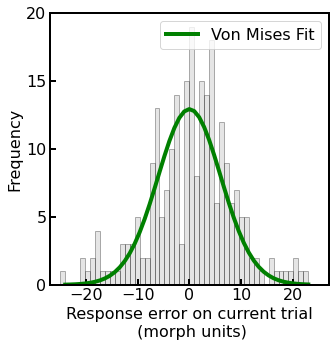

In [134]:
# row = 0
# fig, axs = plt.subplots(1,2, figsize=(15, 5), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.18)
# for subject in subject_names_wsuper:
subject='AR'
# load data:
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]
counts, bin_edges = np.histogram(subjectdata['responseError'], bins=n_bins)
counts[counts < 5] = 0

popt_cauchy, _ = curve_fit(cauchy, bin_edges[1:], counts) 
popt_gaussian, _ = curve_fit(gaussian, bin_edges[1:], counts)
popt_vm_centered0, _ = curve_fit(vm_centered0, bin_edges[1:], counts)


plt.figure(figsize=(5, 5))
plt.hist(subjectdata['responseError'], bins=n_bins, alpha=0.3, color='darkgrey', edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Response error on current trial\n (morph units)')
plt.plot(bin_edges[1:], vm_centered0(bin_edges[1:], *popt_vm_centered0), color='green', label='Von Mises Fit', linewidth=4)
# plt.plot(bin_edges, vm_centered0(bin_edges, *popt_vm_centered0), color='green', label='Von Mises Fit', linewidth=4)

plt.legend()
plt.yticks(np.arange(0, 25, 5))
plt.xlim([-27, 27])
plt.xticks(np.arange(-20, 23, 10))
plt.savefig('PDF.eps', bbox_inches='tight', dpi=1200)
plt.savefig('PDF.svg', bbox_inches='tight', dpi=1200)
plt.savefig('PDF.jpg', bbox_inches='tight', dpi=1200)
# axs[1].bar(good_cdf_data['SUBJECT'], good_cdf_data['JND_vm_centered0'], color='darkgrey', yerr=jnd_vm_centered0_sem_all, edgecolor='black')
# axs[1].set_xticklabels(subject_names + ['  Mean'])
# axs[1].set_ylabel('CRD')
# axs[1].set_xlabel('Subject')
# axs[1].set_ylim([0, 6.5])



In [75]:
radiologist_cdf = pd.read_csv('cdf_radiologists.csv')

In [76]:
naives_crd = good_cdf_data[['JND_VM']].iloc[range(11)]
naives_crd['GROUP'] = 'NAIVES'

radiologists = radiologist_cdf[['JND_VM']].iloc[range(13)]
radiologists['GROUP'] = 'RADIOLOGISTS'
crd_all = pd.concat([radiologists, naives_crd])

In [77]:

# sum_plot = pd.DataFrame()
# sum_plot.loc[0, 'GROUP'] = 'NAIVES'
# sum_plot.loc[0, 'MEAN'] = np.mean(naives_crd['JND_VM'])
# sum_plot.loc[1, 'GROUP'] = 'RADIOLOGISTS'
# sum_plot.loc[1, 'MEAN'] = np.mean(radiologists['JND_VM'])

In [78]:
sum_plot = pd.DataFrame()
sum_plot.loc[0, 'GROUP'] = 'RADIOLOGISTS'
sum_plot.loc[0, 'MEAN'] = np.mean(radiologists['JND_VM'])
sum_plot.loc[1, 'GROUP'] = 'NAIVES'
sum_plot.loc[1, 'MEAN'] = np.mean(naives_crd['JND_VM'])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

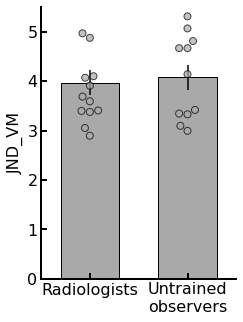

In [86]:
plt.figure(figsize=(3.5, 5))
plt.bar(sum_plot['GROUP'], sum_plot['MEAN'],  color='darkgrey', edgecolor='black', yerr=[stats.sem(radiologists['JND_VM']),stats.sem(naives_crd['JND_VM'])], width=0.6)
ax = sns.swarmplot(x='GROUP', y="JND_VM", data=crd_all, dodge=True, size=7, alpha=0.7,edgecolor='k', linewidth=1, palette=['darkgrey', 'darkgrey'])
sns.despine()
# plt.ylabel('Continuous                          \nReport                          \nDiscrimination                          ', rotation=0)
plt.xlabel('')
plt.ylim([0, 5.5])
ax.set_xticklabels(['Radiologists', 'Untrained\nobservers'])

plt.yticks(np.arange(0, 6, 1.0))
plt.savefig('CRD_all.eps', bbox_inches='tight', dpi=1200)
plt.savefig('CRD_all.svg', bbox_inches='tight', dpi=1200)
plt.savefig('CRD_all.jpg', bbox_inches='tight', dpi=1200)

In [217]:
sum_plot

,GROUP,MEAN
0,NAIVES,4.078487
1,RADIOLOGISTS,3.965721


In [219]:
[stats.sem(naives_crd['JND_VM']), stats.sem(radiologists['JND_VM'])]

[0.25958108032781513, 0.25380105923495533]

# Figure slopes 

In [13]:
figures_path

'/Users/teresa/PycharmProjects/Serial_Dependence_Analysis_Base/figures'

In [17]:
radiologist_path = figures_path + '/JND_radiologists/'
radiologist_slopes = pd.read_csv(radiologist_path + 'slopes_empirical_v1.csv', index_col = 0)

naives_slopes = pd.read_csv('slopes_empirical_v1.csv', index_col=0)

## First version 

In [69]:
slope_figure = pd.DataFrame()
slope_figure.loc[0, 'GROUP'] = 'NAIVES'
slope_figure.loc[0, 'TYPE'] = 'SAME'
slope_figure.loc[0, 'MEAN'] = np.mean(naives_slopes.loc[naives_slopes['TYPE'] == 'SAME', 'SLOPE'])
slope_figure.loc[1, 'GROUP'] = 'NAIVES'
slope_figure.loc[1, 'TYPE'] = 'DIFFERENT'
slope_figure.loc[1, 'MEAN'] = np.mean(naives_slopes.loc[naives_slopes['TYPE'] == 'DIFFERENT', 'SLOPE'])
slope_figure.loc[2, 'GROUP'] = 'RADIOLOGISTS'
slope_figure.loc[2, 'TYPE'] = 'SAME'
slope_figure.loc[2, 'MEAN'] = np.mean(radiologist_slopes.loc[radiologist_slopes['TYPE'] == 'SAME', 'SLOPE'])
slope_figure.loc[3, 'GROUP'] = 'RADIOLOGISTS'
slope_figure.loc[3, 'TYPE'] = 'DIFFERENT'
slope_figure.loc[3, 'MEAN'] = np.mean(radiologist_slopes.loc[radiologist_slopes['TYPE'] == 'DIFFERENT', 'SLOPE'])


ci97_null, ci02_null = get_CI_boot(naives_slopes.loc[naives_slopes['TYPE'] == 'SAME', 'SLOPE'])
slope_figure.loc[0, 'ERROR'] = ci97_null - slope_figure.loc[0, 'MEAN']

ci97_null, ci02_null = get_CI_boot(naives_slopes.loc[naives_slopes['TYPE'] == 'DIFFERENT', 'SLOPE'])
slope_figure.loc[1, 'ERROR'] = ci97_null - slope_figure.loc[1, 'MEAN']

ci97_null, ci02_null = get_CI_boot(radiologist_slopes.loc[radiologist_slopes['TYPE'] == 'SAME', 'SLOPE'])
slope_figure.loc[2, 'ERROR'] = ci97_null - slope_figure.loc[2, 'MEAN']

ci97_null, ci02_null = get_CI_boot(radiologist_slopes.loc[radiologist_slopes['TYPE'] == 'DIFFERENT', 'SLOPE'])
slope_figure.loc[3, 'ERROR'] = ci97_null - slope_figure.loc[3, 'MEAN']



slope_figure

,GROUP,TYPE,MEAN,ERROR
0,NAIVES,SAME,0.258145,0.096718
1,NAIVES,DIFFERENT,-0.080778,0.209686
2,RADIOLOGISTS,SAME,0.215078,0.092116
3,RADIOLOGISTS,DIFFERENT,0.141845,0.179143


<AxesSubplot:xlabel='GROUP', ylabel='MEAN'>

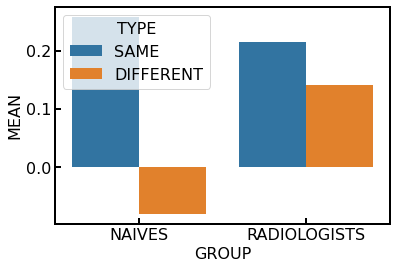

In [25]:
sns.barplot(x='GROUP', y='MEAN', hue='TYPE', data=slope_figure)

In [149]:
def get_CI_boot(data, nIterations=5000):
    sorted_null = sorted(data)
    ci97_null = sorted_null[int(nIterations*0.97)]
    ci02_null = sorted_null[int(nIterations*0.025)]
    
    mean = np.mean(sorted_null)
    ci97_null = ci97_null - mean
    ci02_null = mean - ci02_null

    return ci97_null, ci02_null
    
boot_ci = pd.DataFrame(
    index=pd.RangeIndex(2),
    columns=pd.RangeIndex(4)
)
ci97_null, ci02_null = get_CI_boot(naives_slopes.loc[naives_slopes['TYPE'] == 'SAME', 'SLOPE'])
boot_ci.iloc[0, 0] = ci02_null
boot_ci.iloc[1, 0] = ci97_null
ci97_null, ci02_null = get_CI_boot(naives_slopes.loc[naives_slopes['TYPE'] == 'DIFFERENT', 'SLOPE'])
boot_ci.iloc[0, 1] = ci02_null
boot_ci.iloc[1, 1] = ci97_null

ci97_null, ci02_null = get_CI_boot(radiologist_slopes.loc[radiologist_slopes['TYPE'] == 'SAME', 'SLOPE'])
boot_ci.iloc[0, 2] = ci02_null
boot_ci.iloc[1, 2] = ci97_null
ci97_null, ci02_null = get_CI_boot(radiologist_slopes.loc[radiologist_slopes['TYPE'] == 'DIFFERENT', 'SLOPE'])
boot_ci.iloc[0, 3] = ci02_null
boot_ci.iloc[1, 3] = ci97_null

<AxesSubplot:xlabel='GROUP', ylabel='MEAN'>

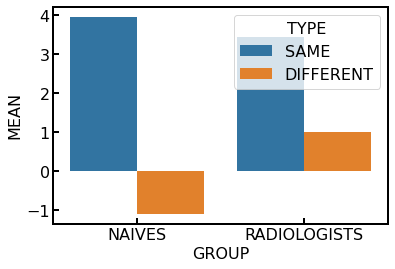

In [30]:
sns.barplot(x='GROUP', y='MEAN', hue='TYPE', data=amps_figure)

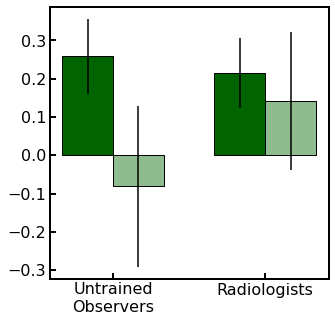

In [94]:
def grouped_barplot(df, cat,subcat, val , err):
    plt.figure(figsize=(5, 5))
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    colors = ['darkgreen', 'darkseagreen']
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{} {}".format(subcat, gr), yerr=dfg[err].values, color=colors[i], edgecolor='black', ecolor='black')
    plt.xlabel('')
#     plt.ylabel(val)
    u = ['Untrained\nObservers', 'Radiologists']
    plt.xticks(x, u)
    plt.savefig('slopes_diff_same.eps', bbox_inches='tight', dpi=1200)
    plt.savefig('slopes_diff_same.svg', bbox_inches='tight', dpi=1200)
    plt.savefig('slopes_diff_same.jpg', bbox_inches='tight', dpi=1200)
    plt.show()

cat = "GROUP"
subcat = "TYPE"
val = "MEAN"
err = "ERROR"
grouped_barplot(slope_figure, cat, subcat, val, err )

In [134]:
slope_figure_radiologists = slope_figure[slope_figure['GROUP'] == 'RADIOLOGISTS'].reset_index(drop=True)

In [135]:
slope_figure_radiologists

,GROUP,TYPE,MEAN,ERROR
0,RADIOLOGISTS,SAME,0.215078,0.092116
1,RADIOLOGISTS,DIFFERENT,0.141845,0.179143


In [150]:
boot_ci_radiologists = boot_ci.iloc[:, 2:4]
display(boot_ci_radiologists)
boot_ci_radiologists = boot_ci_radiologists.to_numpy()

,2,3
0,0.095768,0.180031
1,0.092116,0.179143


In [151]:
boot_ci_radiologists

array([[0.09576799319187043, 0.18003076565050605],
       [0.09211584493915739, 0.17914283241343115]], dtype=object)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


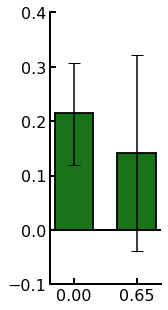

In [198]:
plt.figure(figsize=(2, 5))
plt.bar([0, 0.65], slope_figure_radiologists['MEAN'], yerr= boot_ci_radiologists, ecolor='black',
       capsize=6,color = ['darkgreen', 'darkgreen'], edgecolor='k', alpha=0.9, width=0.4, linewidth=2, align='center')
plt.ylim([-0.1, 0.4])
plt.xticks([0, 0.65])
plt.axhline(0, linestyle='-', linewidth=2, c='k')
sns.despine()
plt.yticks(np.arange(-0.1, 0.5, 0.1));
plt.savefig('DIFFSAME_RADIO.eps', bbox_inches='tight', dpi=1200)
plt.savefig('DIFFSAME_RADIO.svg', bbox_inches='tight', dpi=1200)
plt.savefig('DIFFSAME_RADIO.jpg', bbox_inches='tight', dpi=1200)

In [ ]:
plt.figure(figsize=(4, 5))
plt.bar(slope_figure_radiologists['TYPE'], slope_figure_radiologists['MEAN'], yerr= boot_ci_radiologists, ecolor='black',
       capsize=6,color = ['darkgreen', 'darkgreen'], edgecolor='k', alpha=0.9, width=0.4, linewidth=2, align='center')
plt.ylim([-0.3, 0.4])
# plt.xlim(-0.2, 1.2)
plt.axhline(0, linestyle='-', linewidth=2, c='k')
sns.despine()
plt.yticks(np.arange(-0.3, 0.5, 0.1));
plt.savefig('DIFFSAME_RADIO.eps', bbox_inches='tight', dpi=1200)
plt.savefig('DIFFSAME_RADIO.svg', bbox_inches='tight', dpi=1200)
plt.savefig('DIFFSAME_RADIO.jpg', bbox_inches='tight', dpi=1200)

## Second version

In [129]:
same_slopes = pd.DataFrame(columns=['NAIVES', 'RADIOLOGISTS'])
same_slopes['NAIVES'] = naives_slopes[naives_slopes['TYPE'] == 'SAME']['SLOPE']
same_slopes['RADIOLOGISTS'] = naives_slopes[radiologist_slopes['TYPE'] == 'SAME']['SLOPE']

diff_slopes = pd.DataFrame()
diff_slopes['NAIVES'] = naives_slopes[naives_slopes['TYPE'] == 'DIFFERENT']['SLOPE']
diff_slopes['RADIOLOGISTS'] = naives_slopes[radiologist_slopes['TYPE'] == 'DIFFERENT']['SLOPE']

In [131]:
col = same_slopes.loc[: , "NAIVES":"RADIOLOGISTS"]
same_slopes['SLOPE'] = col.mean(axis=1)


col = diff_slopes.loc[: , "NAIVES":"RADIOLOGISTS"]
diff_slopes['SLOPE'] = col.mean(axis=1)

In [132]:
slope_figure_v2 = pd.DataFrame()
slope_figure_v2.loc[0, 'TYPE'] = 'SAME'
slope_figure_v2.loc[0, 'MEAN'] = np.mean(same_slopes['SLOPE'])
slope_figure_v2.loc[1, 'TYPE'] = 'DIFFERENT'
slope_figure_v2.loc[1, 'MEAN'] = np.mean(diff_slopes['SLOPE'])

ci97_null, ci02_null = get_CI_boot(same_slopes['SLOPE'])
slope_figure_v2.loc[0, 'ERROR'] = ci97_null - slope_figure_v2.loc[0, 'MEAN']

ci97_null, ci02_null = get_CI_boot(diff_slopes['SLOPE'])
slope_figure_v2.loc[1, 'ERROR'] = ci97_null - slope_figure_v2.loc[1, 'MEAN']


slope_figure_v2

,TYPE,MEAN,ERROR
0,SAME,0.258145,0.096718
1,DIFFERENT,-0.080778,0.209686


In [115]:
boot_ci = pd.DataFrame(
    index=pd.RangeIndex(2),
    columns=pd.RangeIndex(2)
)
ci97_null, ci02_null = get_CI_boot(same_slopes['SLOPE'])
boot_ci.iloc[0, 0] = ci02_null
boot_ci.iloc[1, 0] = ci97_null
ci97_null, ci02_null = get_CI_boot(diff_slopes['SLOPE'])
boot_ci.iloc[0, 1] = ci02_null
boot_ci.iloc[1, 1] = ci97_null
boot_ci


,0,1
0,0.115617,-0.315434
1,0.234761,0.034901


<AxesSubplot:xlabel='TYPE', ylabel='MEAN'>

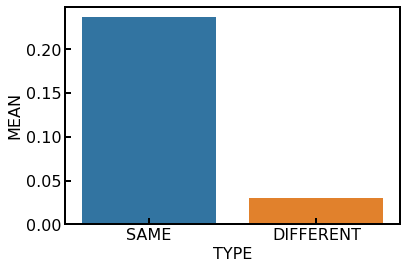

In [116]:
sns.barplot(x='TYPE', y='MEAN', data=slope_figure_v2)

# Figure amplitudes

In [26]:
radiologist_path = figures_path + '/JND_radiologists/'
radiologist_amps = pd.read_csv(radiologist_path + 'amps_empirical_v1.csv', index_col = 0)

naives_amps = pd.read_csv('amps_empirical_v1.csv', index_col=0)

In [29]:
amps_figure = pd.DataFrame()
amps_figure.loc[0, 'GROUP'] = 'NAIVES'
amps_figure.loc[0, 'TYPE'] = 'SAME'
amps_figure.loc[0, 'MEAN'] = np.mean(naives_amps.loc[naives_amps['TYPE'] == 'SAME', 'AMPLITUDE'])
amps_figure.loc[1, 'GROUP'] = 'NAIVES'
amps_figure.loc[1, 'TYPE'] = 'DIFFERENT'
amps_figure.loc[1, 'MEAN'] = np.mean(naives_amps.loc[naives_amps['TYPE'] == 'DIFFERENT', 'AMPLITUDE'])
amps_figure.loc[2, 'GROUP'] = 'RADIOLOGISTS'
amps_figure.loc[2, 'TYPE'] = 'SAME'
amps_figure.loc[2, 'MEAN'] = np.mean(radiologist_amps.loc[radiologist_amps['TYPE'] == 'SAME', 'AMPLITUDE'])
amps_figure.loc[3, 'GROUP'] = 'RADIOLOGISTS'
amps_figure.loc[3, 'TYPE'] = 'DIFFERENT'
amps_figure.loc[3, 'MEAN'] = np.mean(radiologist_amps.loc[radiologist_amps['TYPE'] == 'DIFFERENT', 'AMPLITUDE'])
amps_figure

,GROUP,TYPE,MEAN
0,NAIVES,SAME,3.961220
1,NAIVES,DIFFERENT,-1.106520
2,RADIOLOGISTS,SAME,3.445975
3,RADIOLOGISTS,DIFFERENT,1.017266


# Efficiency 

In [87]:
def amplitude_calc(data, title):
    ## Von Mise fitting: Shape Similarity##
    init_vals = [-25, 4]
    best_vals, covar = curve_fit(vonmise_derivative, data['Stim_diff'], data['responseError'], p0=init_vals, bounds = ([-60,2],[60,4]))
    #### RUNNING MEAN ####
    RM, xvals = getRunningMean(data['Stim_diff'], data['responseError'], step = 20)

    plt.figure(figsize=(5, 4))
    plt.plot(data['Stim_diff'], data['responseError'], color='dodgerblue', marker='o', linestyle='none', alpha=0.7, markersize=5)
    x = np.linspace(-75, 75, 300)
    y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]
    DoVM_values = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in data['Stim_diff']]
    plt.plot(x, y, '-', linewidth = 4, color='k')
    plt.plot(xvals, RM, label = 'Running Mean', color = 'red', linewidth = 3)
    peak_x = (x[np.argmax(y)])
    poly1d_fn, coef = getRegressionLine(x = data['Stim_diff'], y= data['responseError'], peak = peak_x)
    xdata = np.linspace(-peak_x, peak_x, 100)
    plt.plot(xdata, poly1d_fn(xdata), linestyle='--', color='powderblue', linewidth = 4)
    plt.xlim([-73, 73])
    plt.ylim([-60, 60])
    plt.yticks(np.arange(-60, 70, 10))
    # plt.xticks(np.arange(-70, 80, 20))
    plt.xticks([-73, -50, -25, 0, 25, 50, 73])
    sns.despine()
    # print(coef[0], coef[1])
    plt.title('Current and previous\n ' + title)
    plt.ylabel('Response Error\n(morph units)')
    plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')
    plt.legend()
#     plt.savefig('RunningMean_DOGfit_Radiologists' + title + '.eps', bbox_inches='tight', dpi=1200)
#     plt.savefig('RunningMean_DOGfit_Radiologists' + title + '.jpg', bbox_inches='tight', dpi=1200)
    plt.show()
    
    if x[np.argmax(y)] > 0: 
        amplitude = np.max(y)
    else: 
        amplitude = -np.max(y)
    return x, y
def vonmise_derivative(xdata, a = 25, kai = 4):
    xdata = xdata / 75 * np.pi
    return - a / (i0(kai) * 2 * np.pi) * exp(kai * cos(xdata)) * kai * sin(xdata) # Derivative of vonmise formula
def getRunningMean(stimuli_diff, filtered_responseError, halfway =74, step = 8):
    RM = [None] * (2 * halfway + 1); # running mean initialization
    xvals = list(range(-halfway, halfway + 1)) # index for running mean -90~90 + -90~90 (avoid error in sep[jj] == 91\92...
    allx_vals = xvals + xvals
    for ii in range(0,len(xvals) - 1): # start running mean calculation 0~180
        if ii - step // 2 >= 0:
            sep = allx_vals[(ii - step // 2) : (ii + step // 2 + 1)] # symmetric to avoid shift
        else:
            sep = allx_vals[(ii - step // 2) : len(allx_vals)] + allx_vals[0 : (ii + step // 2 + 1)]
        sep_sum = []
        for jj in range(0,len(sep)): # match every value in sep to every stimuli_diff point
            for kk in range(0, len(stimuli_diff)):
                if stimuli_diff[kk] == sep[jj]:
                    sep_sum.insert(0, filtered_responseError[kk])
        RM[ii] = np.mean(sep_sum)
    RM[2 * halfway] = RM[0]
    return RM, xvals

def getRegressionLine(x, y, peak):
    stimuli_diff_filtered = []
    filtered_responseError_new = []
    for i in range(len(x)):
        if x[i] < peak + 1 and x[i] > - peak + 1:
            stimuli_diff_filtered.append(x[i])
            filtered_responseError_new.append(y[i])
    coef = np.polyfit(stimuli_diff_filtered,filtered_responseError_new,1)
    poly1d_fn = np.poly1d(coef)
    return poly1d_fn, coef
#     return amplitude
def vm(x, mean, kai, amplitude):
    x = (x/53)*np.pi
    return amplitude * (np.exp(kai * np.cos(x-mean)) / (i0(kai) * 2 * np.pi))


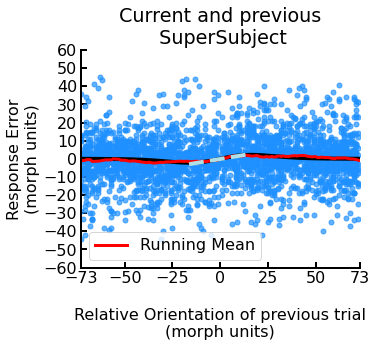

In [88]:
subject = 'SuperSubject'
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_-1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)].reset_index(drop=True)
x_dog, y_dog = amplitude_calc(subjectdata, subject)

In [89]:
efficiency_naives_y = []
for idx in range(len(x_dog)):
    efficiency_naives_y.append(y_dog[idx]/x_dog[idx])
    


In [108]:
y_dog

[-1.2087454442494728e-17,
 -0.002074877623592769,
 -0.004154337903123864,
 -0.006242976039990444,
 -0.008345412348774159,
 -0.010466304869360172,
 -0.012610362045292998,
 -0.014782355489783709,
 -0.01698713286020251,
 -0.019229630861148126,
 -0.021514888395279753,
 -0.02384805988000232,
 -0.02623442874681391,
 -0.028679421138629993,
 -0.03118861981867653,
 -0.03376777830257772,
 -0.036422835223028284,
 -0.03915992893391458,
 -0.041985412357906225,
 -0.04490586807835595,
 -0.04792812367278769,
 -0.0510592672812956,
 -0.05430666339878189,
 -0.0576779688751058,
 -0.06118114910184805,
 -0.0648244943585023,
 -0.06861663628442692,
 -0.07256656443581272,
 -0.07668364287918662,
 -0.08097762676456471,
 -0.0854586788122347,
 -0.09013738563726757,
 -0.0950247738251967,
 -0.10013232566082957,
 -0.10547199439985222,
 -0.11105621895973067,
 -0.11689793789238861,
 -0.12301060248625661,
 -0.12940818882952634,
 -0.13610520864983758,
 -0.14311671872819456,
 -0.15045832866668232,
 -0.15814620677060576,
 

In [90]:
efficiency_naives_x_tmp = np.linspace(-75, 75, 300)
crd = 4.08
efficiency_naives_x = []
for idx in range(len(efficiency_naives_x_tmp)):
    efficiency_naives_x.append(efficiency_naives_x_tmp[idx]/crd)


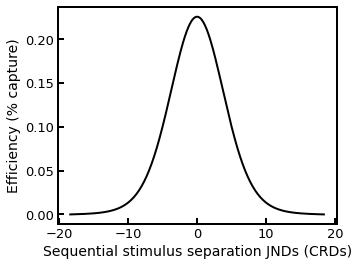

In [91]:
plt.figure(figsize=(5, 4))
plt.plot(efficiency_naives_x, efficiency_naives_y, linewidth=2, color='black')
plt.ylabel('Efficiency (% capture)', fontsize=14)
plt.xlabel('Sequential stimulus separation JNDs (CRDs)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);


In [92]:
radiologist_path = figures_path + '/JND_radiologists/'
efficiency_radiologists_x = np.load(radiologist_path + 'efficiency_radiologists_x.npy')
efficiency_radiologists_y = np.load(radiologist_path + 'efficiency_radiologists_y.npy')

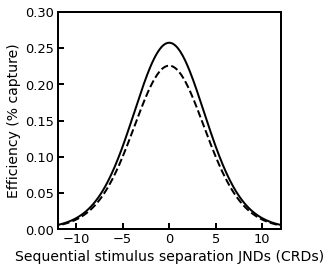

In [104]:
plt.figure(figsize=(4, 4))
plt.plot(efficiency_radiologists_x, efficiency_radiologists_y, linewidth=2, color='black')
plt.plot(efficiency_naives_x, efficiency_naives_y, linewidth=2, color='black', linestyle='--')
plt.xlim([-12, 12])
plt.ylim([0, 0.3])

plt.xticks(np.arange(-10, 12, 5))
plt.ylabel('Efficiency (% capture)', fontsize=14)
plt.xlabel('Sequential stimulus separation JNDs (CRDs)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);
plt.savefig('Efficiency_all.eps',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_all.svg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_all.jpg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_all.pdf',bbox_inches='tight', dpi=1000)



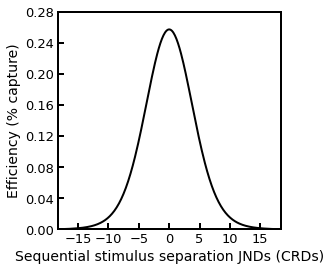

In [135]:
plt.figure(figsize=(4, 4))
plt.plot(efficiency_radiologists_x, efficiency_radiologists_y, linewidth=2, color='black')
# plt.plot(efficiency_naives_x, efficiency_naives_y, linewidth=2, color='black', linestyle='--')
crd_radiologists = 3.97
minx = -73/3.97
maxx= 73/3.97
plt.ylim([0, 0.28])
plt.yticks(np.arange(0, 0.28, 0.04))
plt.xticks([-15, -10, -5, 0, 5, 10, 15])
plt.xlim([minx, maxx])
# plt.xticks(np.arange(-20, 21, 5))
plt.ylabel('Efficiency (% capture)', fontsize=14)
plt.xlabel('Sequential stimulus separation JNDs (CRDs)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);
plt.savefig('Efficiency_radiologists.eps', bbox_inches='tight',dpi=1000)
plt.savefig('Efficiency_radiologists.svg', bbox_inches='tight',dpi=1000)
plt.savefig('Efficiency_radiologists.jpg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_radiologists.pdf',bbox_inches='tight', dpi=1000)


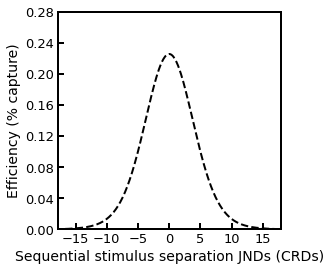

In [136]:
plt.figure(figsize=(4, 4))
plt.plot(efficiency_naives_x, efficiency_naives_y, linewidth=2, color='black', linestyle='--')
# plt.plot(efficiency_naives_x, efficiency_naives_y, linewidth=2, color='black', linestyle='--')
crd_naives = 4.08
minx = -73/crd_naives
maxx= 73/crd_naives
plt.ylim([0, 0.28])
plt.yticks(np.arange(0, 0.28, 0.04))
plt.xticks([-15, -10, -5, 0, 5, 10, 15])
plt.xlim([minx, maxx])
# plt.xticks(np.arange(-20, 21, 5))
plt.ylabel('Efficiency (% capture)', fontsize=14)
plt.xlabel('Sequential stimulus separation JNDs (CRDs)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);
plt.savefig('Efficiency_naives.eps',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_naives.svg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_naives.jpg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_naives.pdf',bbox_inches='tight', dpi=1000)


In [156]:
from scipy.integrate import simps
from numpy import trapz


efficiency_naives_y_perc = [i*100 for i in efficiency_naives_y]
area_naives = trapz(efficiency_naives_y_perc, x=efficiency_naives_x)
area_rectangle = (maxx - minx)*100
print(area_naives, area_rectangle)
print((area_naives/area_rectangle)*100)

227.70422518208156 3578.431372549019
6.36324136125269


In [158]:
efficiency_radiologists_y_perc = [i*100 for i in efficiency_radiologists_y]
area_radiologists = trapz(efficiency_radiologists_y_perc, x=efficiency_radiologists_x)
area_rectangle = (maxx - minx)*100
print(area_radiologists, area_rectangle)
print((area_radiologists/area_rectangle)*100)

259.71786565125126 3578.431372549019
7.257869122308939


In [146]:
area_rectangle

35.78431372549019

## Bootstrap 

In [185]:
def DoG(x, amplitude, sigma2):
    return - amplitude * x / (sigma2 ** 1.5 * np.sqrt(2 * np.pi)) * exp(- x ** 2 / (2 * sigma2))

def efficiency_xy(x_dog, y_dog):
    efficiency_y = []
    for idx in range(len(x_dog)):
        efficiency_y.append(y_dog[idx]/x_dog[idx])

    efficiency_x_tmp = np.linspace(-75, 75, 300)
    crd = 3.97
    efficiency_x = []
    for idx in range(len(efficiency_x_tmp)):
        efficiency_x.append(efficiency_x_tmp[idx]/crd)
        
    return efficiency_x, efficiency_y
        
def CurvefitFunc(x, y, func=DoG, init_vals=[-20, 10], bounds_input = ([-np.inf,10],[0,74])):
    best_vals, covar = curve_fit(func, x, y, p0=init_vals, bounds = bounds_input)
    return best_vals

In [227]:
efficiency_x_iterations = pd.DataFrame()
efficiency_y_iterations = pd.DataFrame()

# bounds_input = ([-60,2],[60,4])
subject = 'SuperSubject'
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_-1nBack.csv')
subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)].reset_index(drop=True)


init_vals=[-20, 10]
bounds_input = ([-np.inf,10],[0,74])
init_vals2 = [-25, 4]
bounds_input3 = ([-60,1],[60,1.5])
init_vals3=[-25, 1.5]
bounds_input2 = ([-60,2],[60,4])
OutA = [] # Output a array, store each trial's a
x = subjectdata['Stim_diff']
y = subjectdata['responseError']
bsSize = int(1.0 * len(x))

for i in range(1000):
    RandIndex = np.random.choice(len(x), bsSize, replace=True) # get randi index of xdata
    xdataNEW = [x[i] for i in RandIndex] # change xdata index
    ydataNEW = [y[i] for i in RandIndex] # change ydata index
    try:
        best_vals, covar = curve_fit(vonmise_derivative, xdataNEW, ydataNEW, p0=init_vals3, bounds = bounds_input3)
#         best_vals, covar = curve_fit(vonmise_derivative, xdataNEW, ydataNEW, p0=init_vals, bounds = bounds_input)
#         temp_best_vals = CurvefitFunc(xdataNEW, ydataNEW, init_vals=init_vals, bounds_input=bounds_input)
        new_x = np.linspace(-75, 75, 300)
        new_y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in new_x]

#         new_y = [DoG(xi,temp_best_vals[0],temp_best_vals[1]) for xi in xdataNEW]
        efficiency_x, efficiency_y = efficiency_xy(new_x, new_y)
        
        efficiency_x_iterations[str(i)] = efficiency_x
        efficiency_y_iterations[str(i)] = efficiency_y
        OutA.append(np.max(new_y))

    except RuntimeError:
        pass
print("bs_a:",round(np.mean(OutA),2),"	95% CI:",np.percentile(OutA,[2.5,97.5]))



bs_a: 2.05 	95% CI: [1.25034031 2.79275934]


In [228]:
efficiency_y_iterations_copy = efficiency_y_iterations.copy()
for i in range(len(efficiency_y_iterations)):
    efficiency_y_iterations.loc[i, 'UPPER'] = sorted(efficiency_y_iterations_copy.iloc[i, :])[int(0.975*1000)]
    efficiency_y_iterations.loc[i, 'LOWER'] = sorted(efficiency_y_iterations_copy.iloc[i, :])[int(0.025*1000)]
    efficiency_y_iterations.loc[i, 'MEDIAN'] = np.median(efficiency_y_iterations_copy.iloc[i, :])
    efficiency_y_iterations.loc[i, 'MEAN'] = np.mean(efficiency_y_iterations_copy.iloc[i, :])
    
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


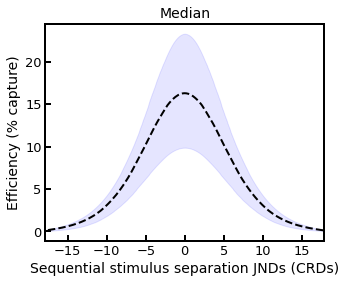

In [229]:
plt.figure(figsize=(5, 4))
plt.plot(efficiency_x_iterations.iloc[:, 0], efficiency_y_iterations['MEDIAN']*100 , linewidth=2, color='black', linestyle='--')
plt.fill_between(efficiency_x_iterations.iloc[:, 0], efficiency_y_iterations['LOWER']*100, efficiency_y_iterations['UPPER']*100, color='b', alpha=.1)

crd_naives = 4.08
minx = -73/crd_naives
maxx= 73/crd_naives
# plt.ylim([0, 0.28])
# plt.yticks(np.arange(0, 0.28, 0.04))
plt.xticks([-15, -10, -5, 0, 5, 10, 15])
plt.xlim([minx, maxx])
# plt.xticks(np.arange(-20, 21, 5))
plt.ylabel('Efficiency (% capture)', fontsize=14)
plt.xlabel('Sequential stimulus separation JNDs (CRDs)', fontsize=14)
plt.title('Median', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);
plt.savefig('Efficiency_naives.eps',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_naives.svg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_naives.jpg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_naives.pdf',bbox_inches='tight', dpi=1000)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


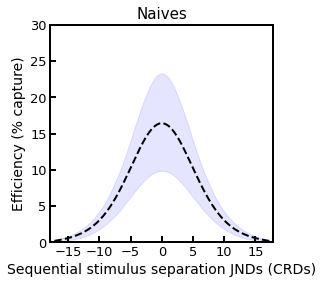

In [232]:
plt.figure(figsize=(4, 4))
plt.plot(efficiency_x_iterations.iloc[:, 0], efficiency_y_iterations['MEAN']*100 , linewidth=2, color='black', linestyle='--')
plt.fill_between(efficiency_x_iterations.iloc[:, 0], efficiency_y_iterations['LOWER']*100, efficiency_y_iterations['UPPER']*100, color='b', alpha=.1)

crd_naives = 4.08
minx = -73/crd_naives
maxx= 73/crd_naives

plt.ylim([0, 30])
plt.yticks(np.arange(0, 32, 5))
plt.xticks([-15, -10, -5, 0, 5, 10, 15])
plt.xlim([minx, maxx])
plt.title('Naives', fontsize=15)

# plt.xticks(np.arange(-20, 21, 5))
plt.ylabel('Efficiency (% capture)', fontsize=14)
plt.xlabel('Sequential stimulus separation JNDs (CRDs)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);
plt.savefig('Efficiency_naives.eps',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_naives.svg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_naives.jpg',bbox_inches='tight', dpi=1000)
plt.savefig('Efficiency_naives.pdf',bbox_inches='tight', dpi=1000)
